In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde
from annotate import Annotate
import time


%matplotlib notebook

In [2]:
#prefix = input("What is the name of the galaxy?")
#for easier inspection:
prefix='NGC5128-S1'
#prefix='CENA-131952'
#prefix='CENA-132302'

In [3]:
#read in photometry (cuts are made in both_phot)
real_file = "%s.phot2" % prefix #IF PHOT INSTEAD OF PHOT2, REACTIVATE LINE 31
real_df = pd.read_csv(real_file, delim_whitespace=True, header=0) #create data frame 
real_df = real_df.iloc[:,:37] #select till relevant end of data frame (quality flag of I)

#define V-I (not Vega)
real_df['V-I'] = real_df['mag_V'] - real_df['mag_I']

<IPython.core.display.Javascript object>


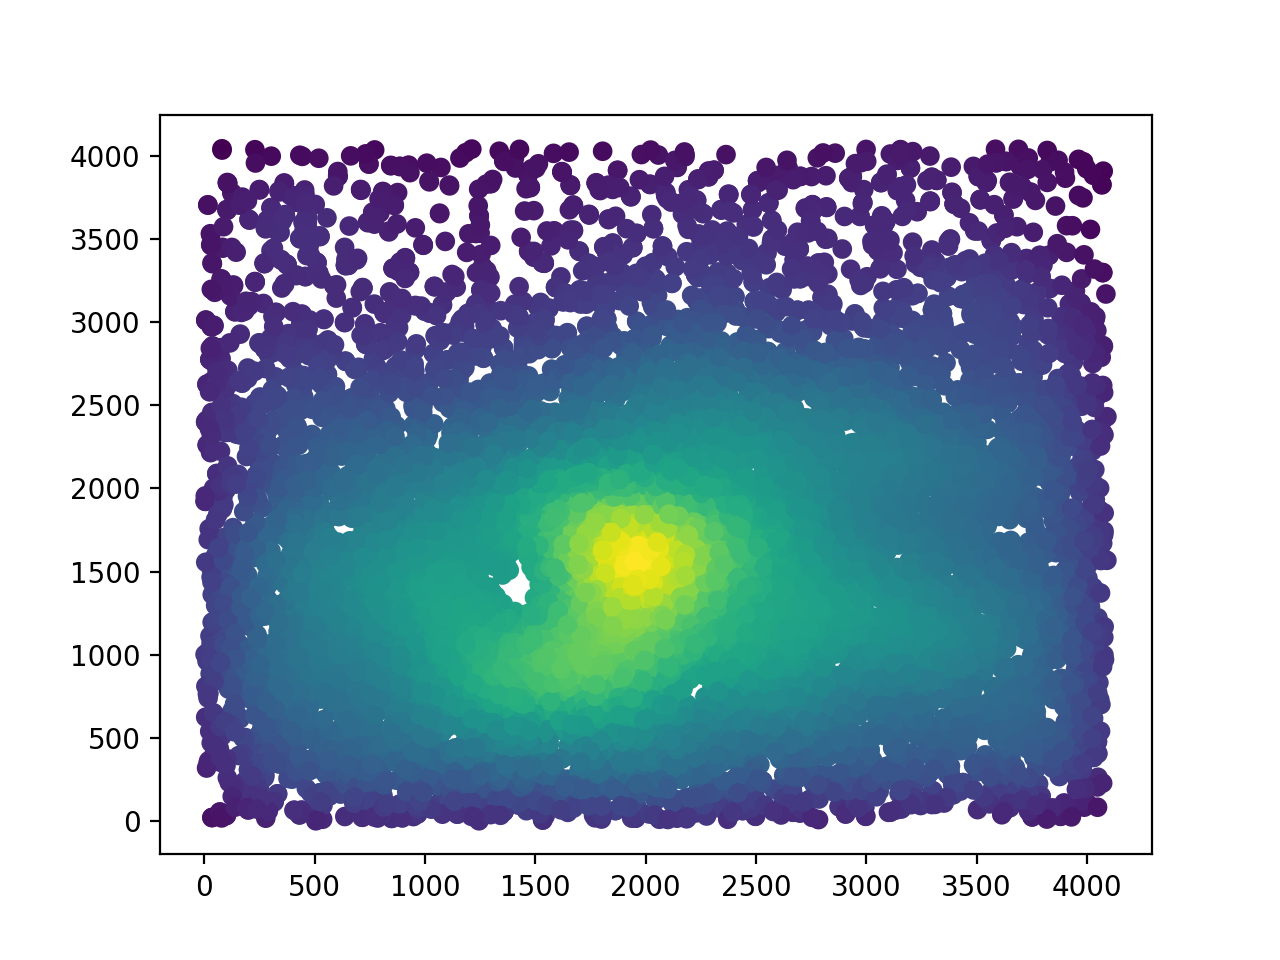

Must make selection from top left to bottom right!


In [6]:
# make density plot
a = real_df['x']
b = real_df['y']
ab = np.vstack([a,b])
c = gaussian_kde(ab)(ab)
fig, ax = plt.subplots()
ax.scatter(a, b, c=c, s=50, edgecolor='')
print('Must make selection from top left to bottom right!')
annotate = Annotate()
plt.show()

# below doesn't seem to help
# for i in range(0,100):
#     ax.clear
#     plt.show()
#     time.sleep(1)
#     annotate = Annotate()

In [ ]:
#open up coordinates and save as variables to be used later
coordinate_file = open('coordinates.txt')
for line in coordinate_file:
    coords = line.strip().split()
    x_low = int(coords[0])
    x_high = int(coords[1])
    y_high = int(coords[2])
    y_low = int(coords[3])
coordinate_file.close()
print(x_low, x_high, y_low, y_high)

In [ ]:
#establish additional cuts based on spatial selection
spatial = real_df[(real_df['x'] > x_low) & (real_df['x'] < x_high) 
        & (real_df['y'] > y_low) & (real_df['y'] < y_high)]

#make V-I plot
mpl.rcParams['agg.path.chunksize'] = 10000
spatial.plot(x='V-I',y='mag_I', marker='o', linestyle='None', markersize='1', figsize=(6,8), color='black')
axes = plt.gca()
axes.set_xlim([-1,3])
axes.set_ylim([28,22])
axes.legend_.remove()
plt.xlabel('V-I')
plt.ylabel('I')
plt.show()